{'pantoprazol': 11, 'omeprazol': 30, 'insulina': 9, 'ibuprofeno': 3, 'alprazolam': 1, 'dexclorfeniramina': 1, 'paroxetina': 4, 'cetoprofeno': 1, 'digoxina': 1, 'ticlopidina': 1, 'amiodarona': 4, 'diazepam': 1, 'clonidina': 1, 'zolpidem': 3, 'amitriptilina': 5, 'esomeprazol': 3, 'sulpirida': 1, 'imipramina': 3, 'testosterona': 1, 'lansoprazol': 1, 'estrogênios': 2, 'clonazepam': 3, 'ciclobenzaprina': 1, 'doxazosina': 3, 'dexlansoprazol': 1, 'orfenadrina': 1, 'quetiapina': 2, 'carisoprodol': 2, 'diclofenaco': 2, 'lorazepam': 1, 'risperidona': 2, 'nitrofurantoína': 1}


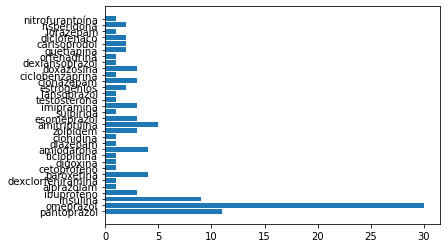

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

drug_file = pd.read_csv('beerscriteria.csv', header=None).values.tolist()
drug_list = drug_file[0]

for i in range(len(drug_list)):
    drug_list[i] = str(drug_list[i]).lower()

patient_list = pd.read_csv('datafinal.csv')

drug_counter = {}

for patient_line in patient_list.values:
  for value in patient_line:
    if str(value).lower() in drug_list:
        if str(value).lower() not in drug_counter:
            drug_counter[str(value).lower()] = 0
        drug_counter[str(value).lower()] += 1

print(drug_counter)

plt.barh(*zip(*drug_counter.items()))
plt.show()

Absolute prevalence:  Counter({0: 230, 1: 72, 2: 14, 3: 2})
Male prevalence:  Counter({0: 71, 1: 16, 2: 4, 3: 1})
Female prevalence:  Counter({0: 159, 1: 56, 2: 10, 3: 1})
{'male': 0.29347826086956524, 'female': 0.3495575221238938}
{'60 - 69': 0.3430232558139535, '70 - 79': 0.3252032520325203, '80 - 89': 0.30434782608695654}
Counter({0: 16, 1: 7})
Counter({0: 90, 1: 27, 2: 5, 3: 1})
Counter({0: 124, 1: 38, 2: 9, 3: 1})


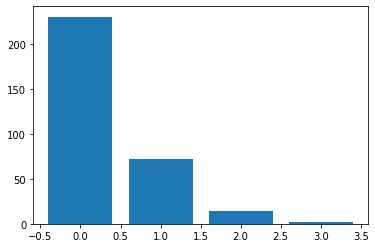

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

drug_file = pd.read_csv('beerscriteria.csv', header=None).values.tolist()
drug_list = drug_file[0]

for i in range(len(drug_list)):
    drug_list[i] = str(drug_list[i]).lower()

patient_list = pd.read_csv('datafinal.csv')

list_of_prevalence = []

prevalence_on_male = []
prevalence_on_female = []

prevalence_sixties = []
prevalence_seventies = []
prevalence_eighties = []

for patient_line in patient_list.values:
    counter = 0
    for value in patient_line:
        if str(value).lower() in drug_list:
            counter += 1
    list_of_prevalence.append(counter)
    if str(patient_line[2]).lower() == 'male':
        prevalence_on_male.append(counter)
    else:
        prevalence_on_female.append(counter)
    if int(patient_line[1]) < 70 and int(patient_line[1]) >= 60:
        prevalence_sixties.append(counter)
    elif int(patient_line[1]) < 80 and int(patient_line[1]) >= 70:
        prevalence_seventies.append(counter)
    else:
        prevalence_eighties.append(counter)


def Average(lst):
    return sum(lst) / len(lst)

prevalence_counter = Counter(list_of_prevalence)
male_counter = Counter(prevalence_on_male)
female_counter = Counter(prevalence_on_female)

sex_prevalence = {
    'male': Average(prevalence_on_male),
    'female': Average(prevalence_on_female)
}

age_prevalence = {
    '60 - 69': Average(prevalence_sixties),
    '70 - 79': Average(prevalence_seventies),
    '80 - 89': Average(prevalence_eighties),
}

print('Absolute prevalence: ' , prevalence_counter)
print('Male prevalence: ' , male_counter)
print('Female prevalence: ' , female_counter)
print(sex_prevalence)
print(age_prevalence)
print(Counter(prevalence_eighties))
print(Counter(prevalence_seventies))
print(Counter(prevalence_sixties))




plt.bar(*zip(*prevalence_counter.items()))
plt.show()
